# IMT 573 - Lab 3 - Advanced Visualization

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Pratiibh Bassi

Collaborators: 

In this module, we have focused on exploring data. Visualization is a great way to do this. Let’s play around with visualization in this lab. To accomplish many of the visualization tasks in the exercise, you will need to also practice newly-acquired data summarization and manipulation skills.

The data we will use in this lab comes from the Million Song Dataset. The Million Song Dataset is a collaboration between the Echo Nest and LabROSA, a laboratory working towards intelligent machine listening. The project was also funded in part by the National Science Foundation of America (NSF) to provide a large data set to evaluate research related to algorithms and information retrieval. 

We will use a subset of this data created by Ryan Whitcomb, rwhit94@vt.edu, which contains data on 10,000 songs. The data contains standard information about the songs such as artist name, title, and year released. Additionally, the data contains more advanced information; for example, the length of the song, how many musical bars long the song is,
and how long the fade in to the song was. You can find more information on the various data elements [here](https://corgis-edu.github.io/corgis/csv/music/)

To start, import the data from `music.csv` into a pandas DataFrame.

http://millionsongdataset.com/

*Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. The Million Song Dataset. In Proceedings of the 12th International Society for Music Information Retrieval Conference (ISMIR 2011), 2011.*

In [2]:
import pandas as pd
data = pd.read_csv('../Downloads/music.csv')

In [4]:
data.head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007


### Problem 1: Inspection

First, inspect the data. You can use functions such as `head()`, `tail()`, and `describe()`. to help you get a sense of what is contained in the data. What do you notice? Where may there be some issues with the data?

In [7]:
data.tail()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,1,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998
9996,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,0,25.62326,Danny Williams,0.0,ballad,0.915417,...,1,0.398,163.463,0.604,0.07692,77.072,3.0,0.597,0,1998
9997,0.433508,0.289903,ARS1DCR1187B9A4A56,0.00000,0,0.00000,Winston Reedy,0.0,lovers rock,0.960115,...,1,0.565,186.015,1.000,0.27924,118.123,4.0,0.205,0,0
9998,0.334457,0.216829,ARAGMIV11F4C843F78,0.00000,0,0.00000,"Myrick ""Freeze"" Guillory",0.0,zydeco,1.000000,...,1,0.503,300.826,0.421,0.28192,137.663,4.0,0.000,0,0
9999,0.609182,0.509243,ARYXOV81187B99831D,0.00000,0,0.00000,Seventh Day Slumber,0.0,christian rock,0.926220,...,0,0.406,193.167,0.710,0.20535,150.575,4.0,0.317,0,2005


In [9]:
data.describe()

,artist.familiarity,artist.hotttnesss,artist.latitude,artist.location,artist.longitude,artist.similar,artist.terms_freq,release.id,release.name,song.artist_mbtags,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
count,10000.000000,10000.000000,10000.000000,10000.000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.565230,0.385552,13.904283,0.078,-23.923863,0.0,2.248903e+02,371024.058400,23.096000,0.000033,...,0.691000,0.477765,229.883436,0.507875,0.299886,122.900913,3.564443,0.599785,10.011400,934.704600
std,0.160528,0.143647,20.356379,7.800,43.723359,0.0,2.239216e+04,236777.828209,1322.901526,0.003330,...,0.462104,0.191269,112.024303,0.332357,0.510925,35.204746,1.266620,8.991567,945.486852,996.650657
min,0.000000,0.000000,-41.280540,0.000,-162.436500,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,-21.394000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467570,0.325266,0.000000,0.000,-73.948880,0.0,9.476125e-01,172858.000000,0.000000,0.000000,...,0.000000,0.360000,168.855750,0.237000,0.110692,96.959500,3.000000,0.097750,0.000000,0.000000
50%,0.563584,0.380742,0.000000,0.000,0.000000,0.0,9.999728e-01,333103.000000,0.000000,0.000000,...,1.000000,0.487000,213.864500,0.500000,0.191520,120.156500,4.000000,0.551000,0.000000,0.000000
75%,0.668020,0.453858,34.419250,0.000,0.000000,0.0,1.000000e+00,573532.500000,0.000000,0.000000,...,1.000000,0.606000,266.274750,0.774250,0.294743,144.006750,4.000000,0.864000,0.000000,2000.000000
max,1.000000,1.082503,69.651020,780.000,174.767140,0.0,2.239217e+06,823599.000000,85555.000000,0.333000,...,1.000000,1.000000,1813.426000,9.227560,12.245830,262.828000,7.000000,898.891000,94496.000000,2010.000000


In [11]:
data.dtypes

artist.familiarity                float64
artist.hotttnesss                 float64
artist.id                          object
artist.latitude                   float64
artist.location                     int64
artist.longitude                  float64
artist.name                        object
artist.similar                    float64
artist.terms                       object
artist.terms_freq                 float64
release.id                          int64
release.name                        int64
song.artist_mbtags                float64
song.artist_mbtags_count          float64
song.bars_confidence              float64
song.bars_start                   float64
song.beats_confidence             float64
song.beats_start                  float64
song.duration                     float64
song.end_of_fade_in               float64
song.hotttnesss                   float64
song.id                            object
song.key                          float64
song.key_confidence               

I can see some potential problems with this dataset, for example, some of the song years are marked as 0 and as a numerical value will throw off results that include song release data.  There are many different variables that this data measures such as confidence, or signature confidence, which can be confusing to try to understand what that means.

Upon further inspection of the song.hotttnesss variable from the data description, we can see that the song.hotttnesss is supposed to be on a scale of 0 to 1, however, we find error data where some songs had a negative song.hotttnesss value (-1) which is an error after viewing the data description.

### Problem 2: Pose a question

Propose a question to guide your analysis. For example, you might ask _does the average hotness scores of songs change over time?_ Or perhaps, _what is the relationship between song duration and tempo?_ You can use one of these questions or develop your own. State which question you want to answer.

What is song hotttnesss you ask? According to the dataset description, it is a measure of the song’s popularity, when downloaded (in December 2010). And measured on a scale of 0 to 1.

What is the relationship between song hotttnesss and artist familiarity?  If an artist is more popular, will their songs be more likely to be considered hot?

### Problem 3: Visualization

Create two visualizations to help gain insight into your question. Be sure to explain the visuals you create and what you take away from them.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='artist.familiarity', ylabel='song.hotttnesss'>

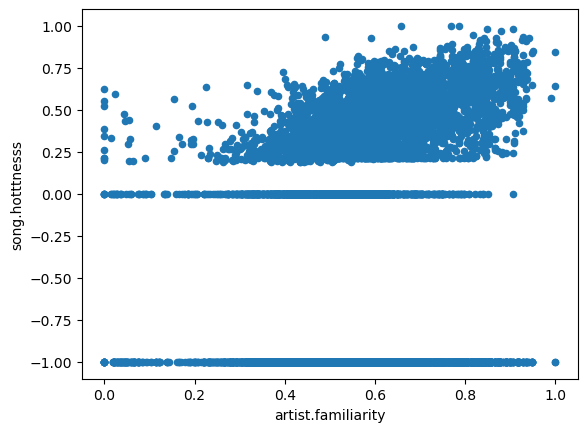

In [82]:
data.plot(kind = "scatter", x = "artist.familiarity", y = "song.hotttnesss")

From the scatterplot above, we can see that as an artists' familiarity level is higher, the more likely they are to produce songs that are considered "hot", or popular.  Although relatively unknown artists are still able to create songs with a hotness level of 0.5-0.75, to unlock that upper threshold of more than 0.75 song hotness, artist popularity is required.  There is a lot of useless data at the bottom of the visualization that should be ignored, as it is just due to incorrect input of data as I mentioned in beginning of analysis with what I thought would be a problem with the dataset.

C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='artist.familiarity', ylabel='song.hotttnesss'>

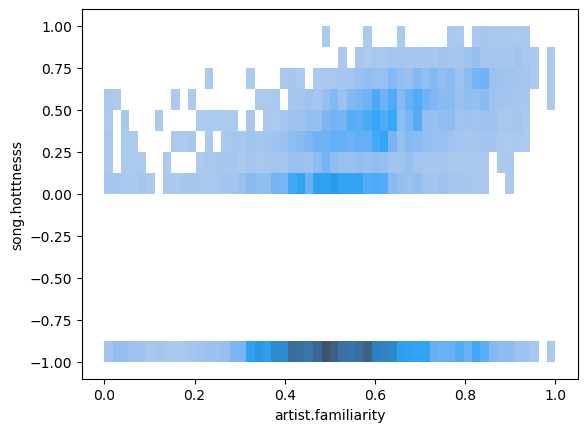

In [100]:
sns.histplot(data=data, x="artist.familiarity", y="song.hotttnesss")

This histplot shows a similar view at how increasing familiarity for an artist yields much hotter songs.  We can see in the middle where there are darker tints of blue, showing that many datapoints lie in this area of the visualization.  This supports the hypothesis that as artists grow to be more familiar, the songs they release are considered to be more hot.  The darker blue trend in thd data can be seen going upwards showing that starting at around 0.5 artist familiarity level, we can see consistent yields for songs being released given a higher hotness level, typically starting from 0.25 and ranging to 0.75.  There is once again useless data in the bottom of the visualization that should be ignored due to incorrect formatting and input of data.